In [1]:
import pandas as pd
import numpy as np
from utils.utilities import *
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import permutations, product
from tqdm import tqdm

In [ ]:
folder = '033-all-and-gates-characterization'

In [2]:
folder = '086-permutation-of-promoters'
inducers = {
    'ara': np.array([0, 13]),
    'ohc14': np.array([0, 10]),
    'sal': np.array([0, 100]),
}
raw_data = generate_raw(folder)

A ['Negative', 'Blank', 'Sample']
B ['Negative', 'Blank', 'Sample']
C ['Positive', 'Negative', 'Blank']


In [3]:
neg_corrected, pos_control = generate_neg_corrected(raw_data, ['A', 'B'], 'C') #list of samples, positive control
pos_corrected = generate_pos_corrected(neg_corrected, pos_control)
final_data_0 = get_data_at(pos_corrected[0], h=8)
final_data_1 = get_data_at(pos_corrected[1], h=8)
final_data = pd.concat([final_data_0, final_data_1], axis=0)

In [11]:
datas = []
promoters = [a+'-'+b for a, b in list(permutations(['PBAD', 'PCin', 'PSalTTC'], 2))]
gates = [a+'-'+b for a, b in list(product(promoters, ['E38']))]
for gate in gates:
    data = final_data[final_data.index.str.startswith(gate)].reset_index()
    data['idx'] = data['name'].str[-4]
    data['i1'] = data['name'].str[-2]
    data['i2'] = data['name'].str[-1]
    data = data.sort_values(['idx', 'i1', 'i2']).set_index(data['i1'] + data['i2'])
    data = pd.concat([data[data['idx']==i].iloc[:, 1] for i in data['idx'].unique()], axis=1)
    data.columns = [gate + '_' + str(i) for i in range(data.shape[1])]
    datas.append(data)
datas

[    PBAD-PCin-E38_0
 00         0.008447
 01         0.012351
 10         0.009568
 11         0.308462,
     PBAD-PSalTTC-E38_0  PBAD-PSalTTC-E38_1
 00            0.007883            0.007086
 01            0.012024            0.012448
 10            0.033962            0.036931
 11            0.284482            0.318999,
     PCin-PBAD-E38_0  PCin-PBAD-E38_1
 00         0.007978         0.007181
 01         0.034571         0.034484
 10         0.007008         0.006874
 11         0.135234         0.136690,
     PCin-PSalTTC-E38_0  PCin-PSalTTC-E38_1
 00            0.007732            0.007393
 01            0.007218            0.007308
 10            0.016965            0.018057
 11            0.121845            0.101032,
     PSalTTC-PBAD-E38_0  PSalTTC-PBAD-E38_1
 00            0.007963            0.006915
 01            0.026814            0.027569
 10            0.006838            0.007116
 11            0.102745            0.115139,
     PSalTTC-PCin-E38_0  PSalTTC-PCin-E3

In [12]:
df = pd.concat(datas, axis=1)
df['Inducer1'] = df.index.str[0]
df['Inducer2'] = df.index.str[1]
df.to_csv('datasets/cleansed/permutation-promoters-E38.csv', index=False)

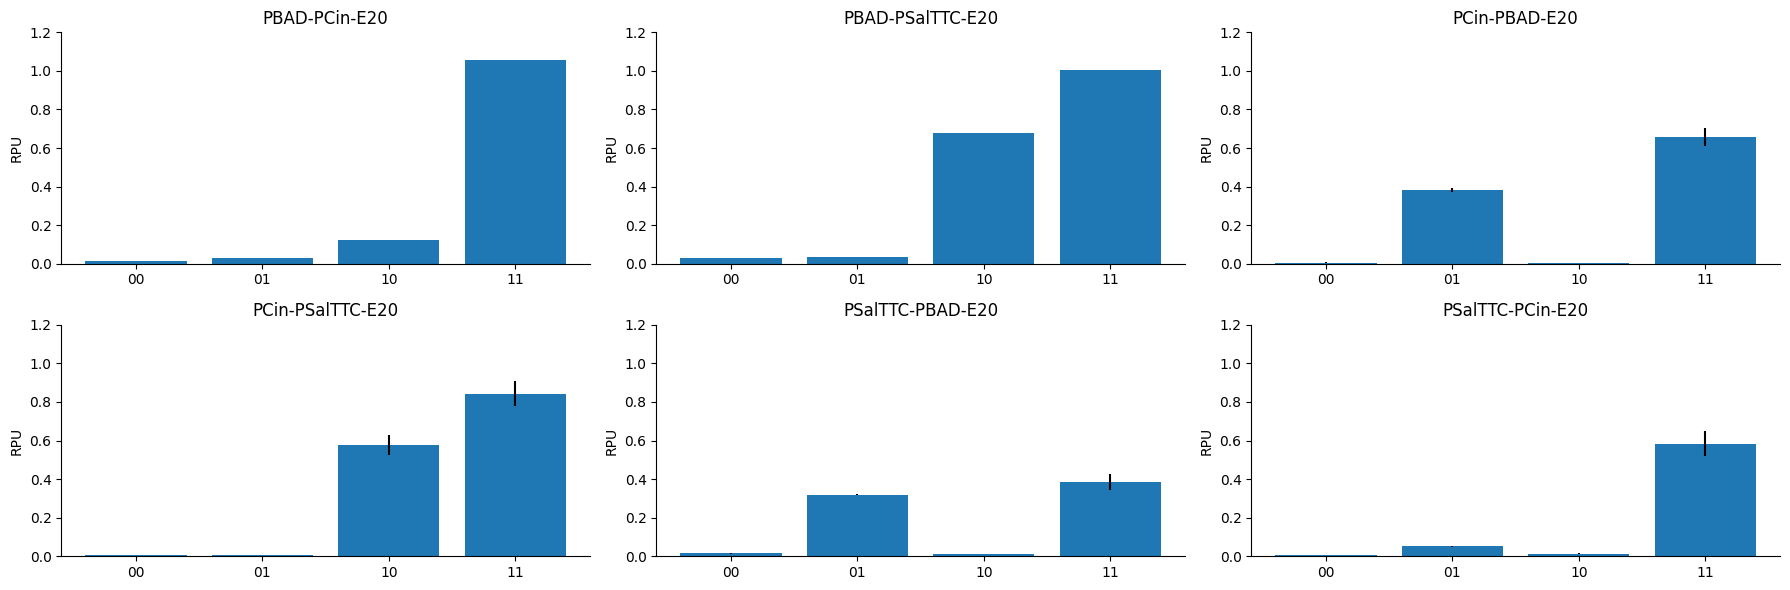

In [82]:
gates = [a+'-'+b for a, b in list(product(promoters, ['E20']))]
row, col = 2, 3
f, axs = plt.subplots(row, col, sharex=False, sharey=False, figsize=(col*6, row*3))
axr = axs.ravel()
for i, ax in enumerate(axr):
    data = final_data[final_data.index.str.startswith(gates[i])].reset_index()
    data['idx'] = data['name'].str[-4]
    data['i1'] = data['name'].str[-2]
    data['i2'] = data['name'].str[-1]
    data = data.sort_values(['idx', 'i1', 'i2']).set_index(data['i1'] + data['i2'])
    data = pd.concat([data[data['idx']==i].iloc[:, 1] for i in data['idx'].unique()], axis=1)
    data['mean'] = data.iloc[:, :2].mean(axis=1)
    data['std'] = data.iloc[:, :2].std(axis=1).fillna(0)
    ax.bar(data.index, data['mean'], yerr=data['std'])
    ax.set_title(gates[i])
    ax.set_ylim([0, 1.2])
    ax.set_ylabel('RPU')
    sns.despine()
plt.tight_layout()

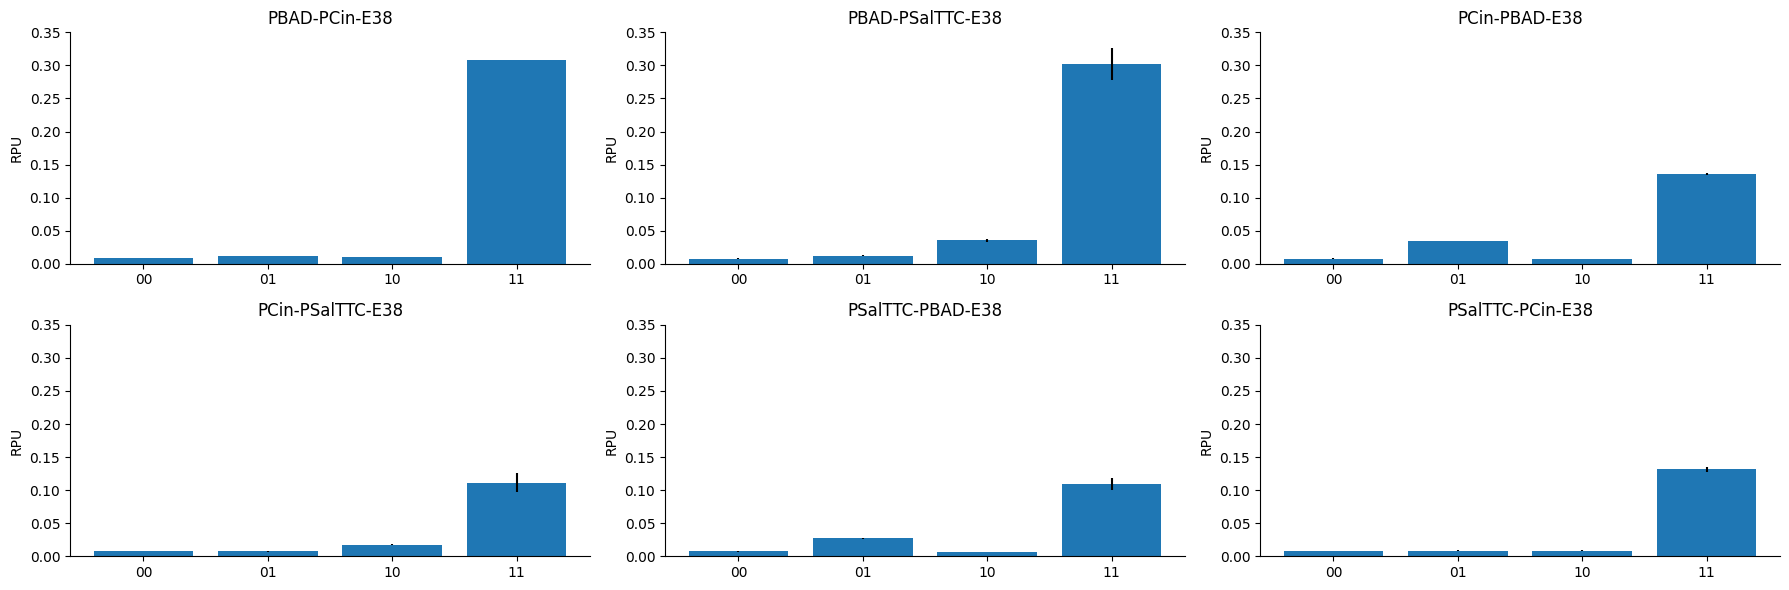

In [85]:
gates = [a+'-'+b for a, b in list(product(promoters, ['E38']))]
row, col = 2, 3
f, axs = plt.subplots(row, col, sharex=False, sharey=False, figsize=(col*6, row*3))
axr = axs.ravel()
for i, ax in enumerate(axr):
    data = final_data[final_data.index.str.startswith(gates[i])].reset_index()
    data['idx'] = data['name'].str[-4]
    data['i1'] = data['name'].str[-2]
    data['i2'] = data['name'].str[-1]
    data = data.sort_values(['idx', 'i1', 'i2']).set_index(data['i1'] + data['i2'])
    data = pd.concat([data[data['idx']==i].iloc[:, 1] for i in data['idx'].unique()], axis=1)
    data['mean'] = data.iloc[:, :2].mean(axis=1)
    data['std'] = data.iloc[:, :2].std(axis=1).fillna(0)
    ax.bar(data.index, data['mean'], yerr=data['std'])
    ax.set_title(gates[i])
    ax.set_ylim([0, 0.35])
    ax.set_ylabel('RPU')
    sns.despine()
plt.tight_layout()

#### Induction Matrix

In [2]:
folder = '089-PBAD-PCin-E20-induction-matrix'
inducers = {
    'ara': np.array([0, 0.203125, 0.8125, 3.25, 13, 52]),
    'ohc14': np.array([0, 0.15625, 0.625, 2.5, 10, 40])
}
raw_data = generate_raw(folder)

A ['Negative', 'Blank', 'Sample']
B ['Negative', 'Blank', 'Positive']


In [3]:
neg_corrected, pos_control = generate_neg_corrected(raw_data, ['A'], 'B') #list of samples, positive control
pos_corrected = generate_pos_corrected(neg_corrected, pos_control)
final_data = get_data_at(pos_corrected[0], h=8)

final_data_1 = final_data[final_data.index.str.startswith('PBAD-PCin-E20')].reset_index()
final_data_1['ind1'] = final_data_1['name'].str[-2]
final_data_1['ind2'] = final_data_1['name'].str[-1]
final_data_1 = pd.concat([pd.DataFrame(product(inducers['ara'], inducers['ohc14']),
                                     columns=['ara', 'ohc14']), final_data_1], axis=1)
final_data_1 = final_data_1.sort_values('name')
final_data_1[['ara', 'ohc14', '8 h ']].rename(columns={'8 h ': 'fluo'}).to_csv('datasets/cleansed/promoter-permutation/PBAD-PCin-E20.csv', index=False)

final_data_2 = final_data[final_data.index.str.startswith('PCin-PBAD-E20')].reset_index()
final_data_2['ind1'] = final_data_2['name'].str[-2]
final_data_2['ind2'] = final_data_2['name'].str[-1]
final_data_2 = pd.concat([pd.DataFrame(product(inducers['ohc14'], inducers['ara']),
                                     columns=['ohc14', 'ara']), final_data_2], axis=1)
final_data_2 = final_data_2.sort_values('name')
final_data_2[['ohc14', 'ara', '8 h ']].rename(columns={'8 h ': 'fluo'}).to_csv('datasets/cleansed/promoter-permutation/PCin-PBAD-E20.csv', index=False)

In [5]:
folder = '090-PBAD-PCin-E20-induction-matrix-2'
inducers = {
    'ara': np.array([0, 0.003173828, 0.012695313, 0.05078125, 0.203125, 0.8125]),
    'ohc14': np.array([0, 0.002441406, 0.009765625, 0.0390625, 0.15625, 0.625])
}
raw_data = generate_raw(folder)

A ['Negative', 'Blank', 'Sample']
B ['Negative', 'Blank', 'Positive']


In [6]:
neg_corrected, pos_control = generate_neg_corrected(raw_data, ['A'], 'B') #list of samples, positive control
pos_corrected = generate_pos_corrected(neg_corrected, pos_control)
final_data = get_data_at(pos_corrected[0], h=8)

final_data_1 = final_data[final_data.index.str.startswith('PBAD-PCin-E20')].reset_index()
final_data_1['ind1'] = final_data_1['name'].str[-2]
final_data_1['ind2'] = final_data_1['name'].str[-1]
final_data_1 = pd.concat([pd.DataFrame(product(inducers['ara'], inducers['ohc14']),
                                     columns=['ara', 'ohc14']), final_data_1], axis=1)
final_data_1 = final_data_1.sort_values('name')
final_data_1[['ara', 'ohc14', '8 h ']].rename(columns={'8 h ': 'fluo'}).to_csv('datasets/cleansed/promoter-permutation/PBAD-PCin-E20-2.csv', index=False)

final_data_2 = final_data[final_data.index.str.startswith('PCin-PBAD-E20')].reset_index()
final_data_2['ind1'] = final_data_2['name'].str[-2]
final_data_2['ind2'] = final_data_2['name'].str[-1]
final_data_2 = pd.concat([pd.DataFrame(product(inducers['ohc14'], inducers['ara']),
                                     columns=['ohc14', 'ara']), final_data_2], axis=1)
final_data_2 = final_data_2.sort_values('name')
final_data_2[['ohc14', 'ara', '8 h ']].rename(columns={'8 h ': 'fluo'}).to_csv('datasets/cleansed/promoter-permutation/PCin-PBAD-E20-2.csv', index=False)

In [4]:
folder = '087-PBAD-PSalTTC-E20-induction-matrix'
inducers = {
    'ara': np.array([0, 0.203125, 0.8125, 3.25, 13, 52]),
    'sal': np.array([0, 1.5625, 6.25, 25, 100, 400])
}
raw_data = generate_raw(folder)

A ['Negative', 'Blank', 'Sample']
B ['Negative', 'Blank', 'Positive']


In [15]:
neg_corrected, pos_control = generate_neg_corrected(raw_data, ['A'], 'B') #list of samples, positive control
pos_corrected = generate_pos_corrected(neg_corrected, pos_control)
final_data = get_data_at(pos_corrected[0], h=8)

final_data_1 = final_data[final_data.index.str.startswith('PBAD-PSalTTC-E20')].reset_index()
final_data_1['ind1'] = final_data_1['name'].str[-2]
final_data_1['ind2'] = final_data_1['name'].str[-1]
final_data_1 = pd.concat([pd.DataFrame(product(inducers['ara'], inducers['sal']),
                                     columns=['ara', 'sal']), final_data_1], axis=1)
final_data_1 = final_data_1.sort_values('name')
#final_data_1[['ara', 'sal', '8 h ']].rename(columns={'8 h ': 'fluo'}).to_csv('datasets/cleansed/promoter-permutation/PBAD-PSalTTC-E20.csv', index=False)

final_data_2 = final_data[final_data.index.str.startswith('PSalTTC-PBAD-E20')].reset_index()
final_data_2['ind1'] = final_data_2['name'].str[-2]
final_data_2['ind2'] = final_data_2['name'].str[-1]
final_data_2 = pd.concat([pd.DataFrame(product(inducers['sal'], inducers['ara']),
                                     columns=['sal', 'ara']), final_data_2], axis=1)
final_data_2 = final_data_2.sort_values('name')
#final_data_2[['sal', 'ara', '8 h ']].rename(columns={'8 h ': 'fluo'}).to_csv('datasets/cleansed/promoter-permutation/PSalTTC-PBAD-E20.csv', index=False)

#pd.concat([final_data_1, final_data_2], axis=1)

In [7]:
folder = '091-PBAD-PSalTTC-E20-induction-matrix-2'
inducers = {
    'ara': np.array([0, 0.003173828, 0.012695313, 0.05078125, 0.203125, 0.8125]),
    'sal': np.array([0, 0.024414063, 0.09765625, 0.390625, 1.5625, 6.25])
}
raw_data = generate_raw(folder)

A ['Negative', 'Blank', 'Sample']
B ['Negative', 'Blank', 'Positive']


In [10]:
neg_corrected, pos_control = generate_neg_corrected(raw_data, ['A'], 'B') #list of samples, positive control
pos_corrected = generate_pos_corrected(neg_corrected, pos_control)
final_data = get_data_at(pos_corrected[0], h=8)

final_data_1 = final_data[final_data.index.str.startswith('PBAD-PSalTTC-E20')].reset_index()
final_data_1['ind1'] = final_data_1['name'].str[-2]
final_data_1['ind2'] = final_data_1['name'].str[-1]
final_data_1 = pd.concat([pd.DataFrame(product(inducers['ara'], inducers['sal']),
                                     columns=['ara', 'sal']), final_data_1], axis=1)
final_data_1 = final_data_1.sort_values('name')
final_data_1[['ara', 'sal', '8 h 28 min']].rename(columns={'8 h 28 min': 'fluo'}).to_csv('datasets/cleansed/promoter-permutation/PBAD-PSalTTC-E20-2.csv', index=False)

final_data_2 = final_data[final_data.index.str.startswith('PSalTTC-PBAD-E20')].reset_index()
final_data_2['ind1'] = final_data_2['name'].str[-2]
final_data_2['ind2'] = final_data_2['name'].str[-1]
final_data_2 = pd.concat([pd.DataFrame(product(inducers['sal'], inducers['ara']),
                                     columns=['sal', 'ara']), final_data_2], axis=1)
final_data_2 = final_data_2.sort_values('name')
final_data_2[['sal', 'ara', '8 h 28 min']].rename(columns={'8 h 28 min': 'fluo'}).to_csv('datasets/cleansed/promoter-permutation/PSalTTC-PBAD-E20-2.csv', index=False)

#pd.concat([final_data_1, final_data_2], axis=1)

In [18]:
folder = '088-PCin-PSalTTC-E20-induction-matrix'
inducers = {
    'ara': np.array([0, 0.203125, 0.8125, 3.25, 13, 52]),
    'ohc14': np.array([0, 0.15625, 0.625, 2.5, 10, 40]),
    'sal': np.array([0, 1.5625, 6.25, 25, 100, 400]),
}
raw_data = generate_raw(folder)

A ['Negative', 'Blank', 'Sample']
B ['Positive', 'Negative', 'Blank']


In [19]:
neg_corrected, pos_control = generate_neg_corrected(raw_data, ['A'], 'B') #list of samples, positive control
pos_corrected = generate_pos_corrected(neg_corrected, pos_control)
final_data = get_data_at(pos_corrected[0], h=8)

final_data_1 = final_data[final_data.index.str.startswith('PCin-PSalTTC-E20')].reset_index()
final_data_1['ind1'] = final_data_1['name'].str[-2]
final_data_1['ind2'] = final_data_1['name'].str[-1]
final_data_1 = pd.concat([pd.DataFrame(product(inducers['ohc14'], inducers['sal']),
                                     columns=['ohc14', 'sal']), final_data_1], axis=1)
final_data_1 = final_data_1.sort_values('name')
final_data_1[['ohc14', 'sal', '8 h ']].rename(columns={'8 h ': 'fluo'}).to_csv('datasets/cleansed/promoter-permutation/PCin-PSalTTC-E20.csv', index=False)

final_data_2 = final_data[final_data.index.str.startswith('PSalTTC-PCin-E20')].reset_index()
final_data_2['ind1'] = final_data_2['name'].str[-2]
final_data_2['ind2'] = final_data_2['name'].str[-1]
final_data_2 = pd.concat([pd.DataFrame(product(inducers['sal'], inducers['ohc14']),
                                     columns=['sal', 'ohc14']), final_data_2], axis=1)
final_data_2 = final_data_2.sort_values('name')
final_data_2[['sal', 'ohc14', '8 h ']].rename(columns={'8 h ': 'fluo'}).to_csv('datasets/cleansed/promoter-permutation/PSalTTC-Cin-E20.csv', index=False)

In [11]:
folder = '092-PCin-PSalTTC-E20-induction-matrix-2'
inducers = {
    'ohc14': np.array([0, 0.002441406, 0.009765625, 0.0390625, 0.15625, 0.625]),
    'sal': np.array([0, 0.024414063, 0.09765625, 0.390625, 1.5625, 6.25])
}
raw_data = generate_raw(folder)

A ['Negative', 'Blank', 'Sample']
B ['Negative', 'Blank', 'Positive']


In [12]:
neg_corrected, pos_control = generate_neg_corrected(raw_data, ['A'], 'B') #list of samples, positive control
pos_corrected = generate_pos_corrected(neg_corrected, pos_control)
final_data = get_data_at(pos_corrected[0], h=8)

final_data_1 = final_data[final_data.index.str.startswith('PCin-PSalTTC-E20')].reset_index()
final_data_1['ind1'] = final_data_1['name'].str[-2]
final_data_1['ind2'] = final_data_1['name'].str[-1]
final_data_1 = pd.concat([pd.DataFrame(product(inducers['ohc14'], inducers['sal']),
                                     columns=['ohc14', 'sal']), final_data_1], axis=1)
final_data_1 = final_data_1.sort_values('name')
final_data_1[['ohc14', 'sal', '8 h ']].rename(columns={'8 h ': 'fluo'}).to_csv('datasets/cleansed/promoter-permutation/PCin-PSalTTC-E20-2.csv', index=False)

final_data_2 = final_data[final_data.index.str.startswith('PSalTTC-PCin-E20')].reset_index()
final_data_2['ind1'] = final_data_2['name'].str[-2]
final_data_2['ind2'] = final_data_2['name'].str[-1]
final_data_2 = pd.concat([pd.DataFrame(product(inducers['sal'], inducers['ohc14']),
                                     columns=['sal', 'ohc14']), final_data_2], axis=1)
final_data_2 = final_data_2.sort_values('name')
final_data_2[['sal', 'ohc14', '8 h ']].rename(columns={'8 h ': 'fluo'}).to_csv('datasets/cleansed/promoter-permutation/PSalTTC-Cin-E20-2.csv', index=False)